Importar bibliotecas e carregar o dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se você fez upload direto:
try:
    df = pd.read_csv('PS4_GamesSales.csv', encoding='utf-8', delimiter=';')
except UnicodeDecodeError:
    df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1', delimiter=';')

Exploração Inicial

In [17]:
# Ver primeiras linhas
df.head()

# Verificar colunas e tipos
df.info()

# Ver estatísticas descritivas
df.describe(include='all')

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           821 non-null    float64
 2   Genre          1030 non-null   object 
 3   Publisher      821 non-null    object 
 4   North America  1030 non-null   float64
 5   Europe         1030 non-null   float64
 6   Japan          1030 non-null   float64
 7   Rest of World  1030 non-null   float64
 8   Global         1030 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


,0
Game,0
Year,213
Genre,4
Publisher,213
North America,4
Europe,4
Japan,4
Rest of World,4
Global,4


Vendas por região

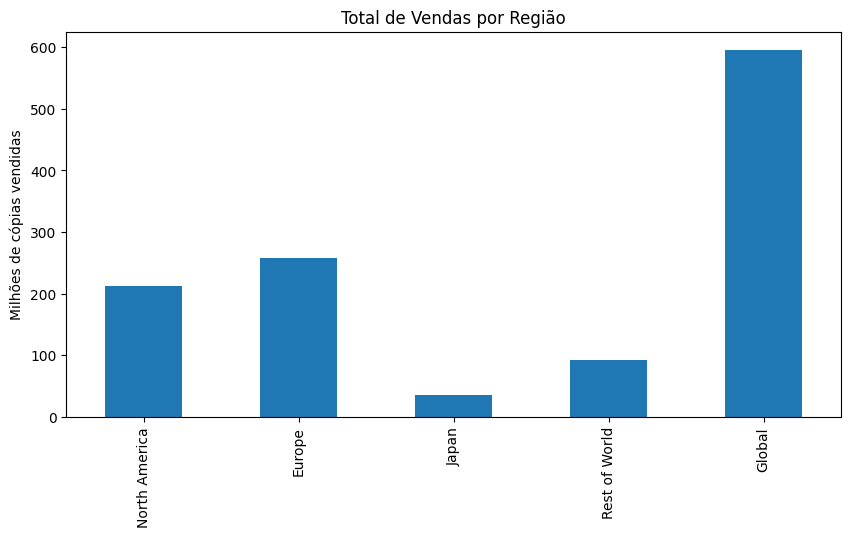

In [18]:
# Vendas por região
regions = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']
df[regions].sum().plot(kind='bar', title='Total de Vendas por Região', figsize=(10, 5))
plt.ylabel('Milhões de cópias vendidas')
plt.show()


 Evolução das vendas por ano

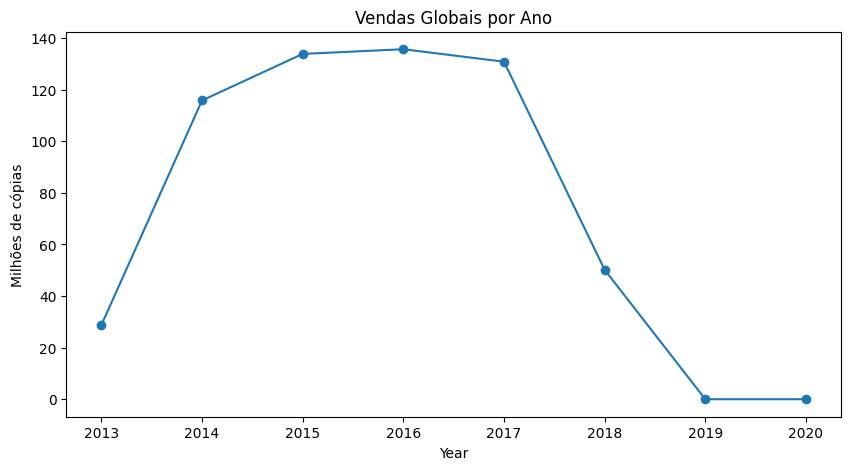

In [19]:
# Agrupar por ano
sales_per_year = df.groupby('Year')['Global'].sum()
sales_per_year.plot(kind='line', marker='o', title='Vendas Globais por Ano', figsize=(10, 5))
plt.ylabel('Milhões de cópias')
plt.show()


 Top 10 jogos mais vendidos

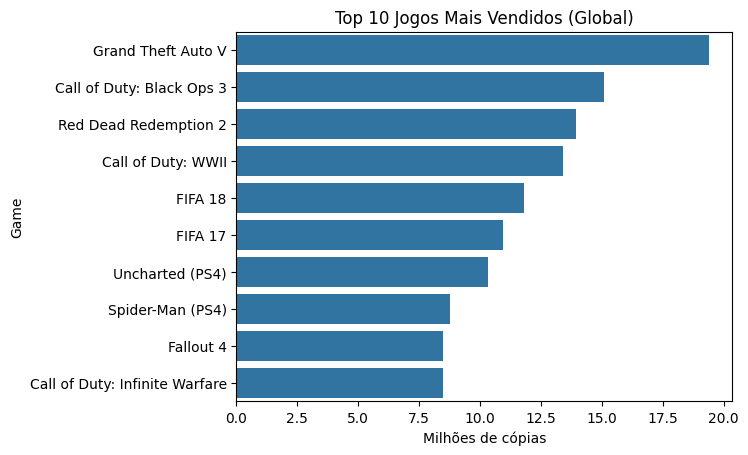

In [20]:
top10 = df.sort_values(by='Global', ascending=False).head(10)
sns.barplot(x='Global', y='Game', data=top10)
plt.title('Top 10 Jogos Mais Vendidos (Global)')
plt.xlabel('Milhões de cópias')
plt.show()


Vendas por gênero

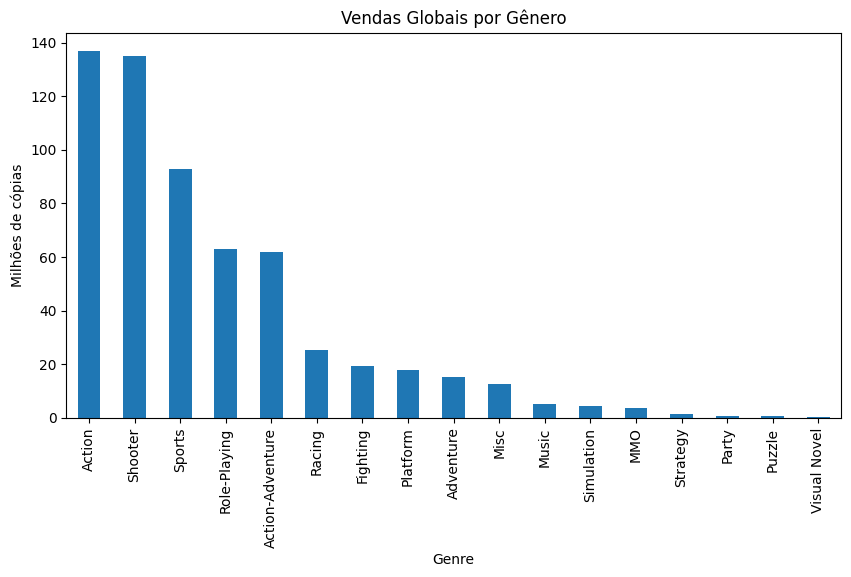

In [21]:
genre_sales = df.groupby('Genre')['Global'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Vendas Globais por Gênero', figsize=(10,5))
plt.ylabel('Milhões de cópias')
plt.show()


Correlações

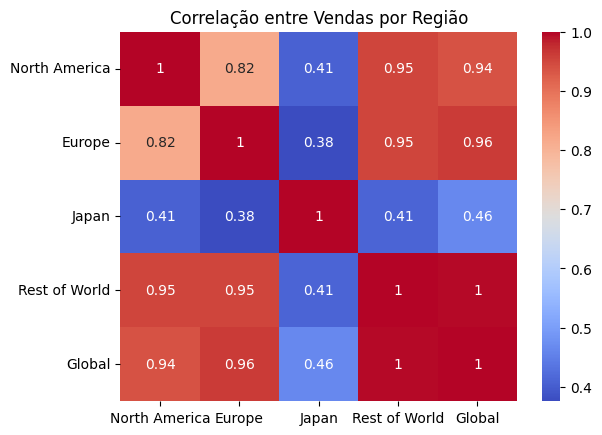

In [22]:
# Correlação entre vendas regionais e globais
sns.heatmap(df[regions].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Vendas por Região')
plt.show()


Modelagem Básica (ex: prever vendas globais)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Drop rows with missing values in the columns used for the model
df_cleaned = df.dropna(subset=['North America', 'Europe', 'Japan', 'Rest of World', 'Global'])

# Features and target
X = df_cleaned[['North America', 'Europe', 'Japan', 'Rest of World']]
y = df_cleaned['Global']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação
score = model.score(X_test, y_test)
print(f'R² do modelo: {score:.2f}')

R² do modelo: 1.00
